# HOAG usage example

We will load an example dataset (20news from scikit-learn) and learn with HOAG the optimal L2 reagularization parameter.

In [30]:
%pylab inline

from hoag import LogisticRegressionCV

# load some data
from sklearn import datasets, linear_model

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [21]:
# get a training set and test set
data_train = datasets.fetch_20newsgroups_vectorized(subset='train')
data_test = datasets.fetch_20newsgroups_vectorized(subset='test')

X_train = data_train.data
X_test = data_test.data
y_train = data_train.target
y_test = data_test.target

# binarize labels
y_train[data_train.target < 10] = -1
y_train[data_train.target >= 10] = 1
y_test[data_test.target < 10] = -1
y_test[data_test.target >= 10] = 1


In [ ]:
# optimize model parameters and hyperparameters jointly
# using HOAG
clf = LogisticRegressionCV()
clf.fit(X_train, y_train, X_test, y_test)

In [ ]:
print('Regularization chosen by HOAG: alpha=%s' % (clf.alpha_[0]))

So above is the the optimal regularization parameter chose by HOAG.

Lets now plot the cost function to see how well HOAG did.  Note that HOAG minimizes a parametrization in which ```clf.alpha_``` is inside an exponential hence we need to take this into account when comparing with the scikit-learn estimator. 

WARNING: this might take a long time to compute (~10 min).

In [59]:
# range for regularization parameters
alphas = np.linspace(-25, 10, 40)

def cost_func(a):
    clf = linear_model.LogisticRegression(
        solver='lbfgs',
        C=np.exp(-a), fit_intercept=False, 
        tol=1e-22, max_iter=500)

    clf.fit(X_train, y_train)
    cost = linear_model.logistic._logistic_loss(clf.coef_.ravel(), X_test, y_test, 0.)
    return cost

scores = [cost_func(a) for a in alphas]



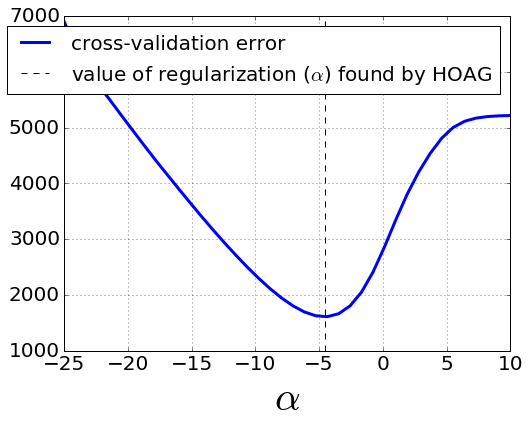

In [69]:
# make the plot bigger than default
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['font.size'] = 20

# plot the scores
plt.plot(alphas, scores, lw=3, label='cross-validation error')
plt.xlabel(r'$\alpha$', fontsize=40)

# plot HOAG value of alpha
plt.plot((clf.alpha_[0], clf.alpha_[0]), (1000, 7000), c='k', linestyle='--', 
         label=r'value of regularization ($\alpha$) found by HOAG')
plt.legend(fontsize=20)
plt.grid()
plt.show()